# Colors

In [39]:

color_map = {
    'M': 'hsl(60, 70%, 70%)',  # เหลือง
    'T': 'hsl(330, 70%, 70%)',  # ชมพู
    'W': 'hsl(120, 70%, 70%)',  # เขียว
    'TH': 'hsl(30, 70%, 70%)',  # ส้ม
    'F': 'hsl(240, 70%, 70%)',  # ฟ้า
    'S': 'hsl(270, 70%, 70%)',  # ม่วง
    'SU': 'hsl(0, 70%, 70%)'  # แดง
}

color_time = {
    'MN': 'hsl(60, 70%, 70%)',  # เหลือง
    'AN': 'hsl(30, 70%, 70%)',  # ส้ม
    'EN': 'hsl(240, 70%, 70%)',  # ฟ้า
    'N': 'hsl(270, 70%, 70%)',  # ม่วง

}


# Import

In [3]:
!pip install feature-engine
from feature_engine.outliers import Winsorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import plotly.offline as pyoff
import plotly.graph_objs as go
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

# Read CSV

In [4]:
# อ่านและเเสดงไฟล์
path1 = "/content/dh_causal_lookup.csv"
dh_causal = pd.read_csv(path1)
dh_causal

,upc,store,week,feature_desc,display_desc,geography
0,7680850108,1,68,Wrap Interior Feature,Not on Display,1
1,5100001212,1,66,Wrap Back Feature,Not on Display,1
2,5100002792,1,72,Interior Page Feature,Not on Display,1
3,3620000300,1,55,Wrap Interior Feature,Not on Display,1
4,4112907742,1,68,Wrap Interior Feature,Not on Display,1
...,...,...,...,...,...,...
351367,9999966721,387,101,Wrap Front Feature,Not on Display,1
351368,9999966720,387,101,Wrap Front Feature,Not on Display,1
351369,3620000507,387,104,Interior Page Feature,Not on Display,1
351370,3620000493,387,104,Interior Page Feature,Not on Display,1


In [5]:
# อ่านและเเสดงไฟล์
path2 = "/content/dh_product_lookup_V3.csv"
dh_product = pd.read_csv(path2)
dh_product

,upc,product_description,commodity,brand,product_size
0,1510000007,CREAMETTE ELBOW MACARONI,pasta,Creamette,1 LB
1,1510000013,CREAMETTE VERMICELLI,pasta,Creamette,1 LB
2,1510000014,CREAMETTE ROTINI RAINBOW,pasta,Creamette,1 LB
3,1510000026,CRMET EGG NOODLES-WIDE,pasta,Creamette,1 LB
4,1510000073,CREAMETTE SHELL MEDIUM,pasta,Creamette,1 LB
...,...,...,...,...,...
922,3068434050,TREE OF LIFE REGULAR BLACKSTRA,syrups,Tree of Life,12 OZ
923,3068434052,TREE OF LIFE REGULAR BLACKSTRA,syrups,Tree of Life,12 OZ
924,4300034901,LOG CABIN MAPLE PANCAKE/WAFFLE,syrups,Log Cabin,24 OZ
925,7151800024,HODG MILL WHO WHT SPIRALS,pasta,Hodgson Mills,16 OZ


In [6]:
# อ่านและเเสดงไฟล์
path3 = "/content/dh_store_lookup.csv"
dh_store = pd.read_csv(path3)
dh_store

,store,store_zip_code
0,1,37865
1,2,30084
2,3,30039
3,4,31210
4,5,30044
...,...,...
382,383,40502
383,384,42367
384,385,37160
385,386,29803


In [7]:
# อ่านและเเสดงไฟล์
path4 = "/content/dh_transactions_v2.csv"
dh_transactions = pd.read_csv(path4)
dh_transactions

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5188091,9999985001,0.39,1,2354,1,104,435465,199,3316346,728,0
5188092,9999966720,1.05,1,2354,1,104,435465,199,3316346,728,0
5188093,9999985027,0.99,1,2311,1,104,352690,218,3316347,728,0
5188094,3620000300,1.53,1,2245,1,104,55530,93,3316348,728,0


In [8]:
list(dh_transactions.columns)

['upc',
 'dollar_sales',
 'units',
 'time_of_transaction',
 'geography',
 'week',
 'household',
 'store',
 'basket',
 'day',
 'coupon']

In [9]:
list(dh_product.columns)

['upc', 'product_description', 'commodity', 'brand', 'product_size']

In [10]:
list(dh_causal.columns)

['upc', 'store', 'week', 'feature_desc', 'display_desc', 'geography']

In [11]:
list(dh_store.columns)

['store', 'store_zip_code']

# Average Pasta Sauce sales per household

In [12]:

merged_data = pd.merge(dh_transactions, dh_product, on='upc', how='inner')

merged_data = merged_data.drop(['upc', 'units', 'time_of_transaction', 'geography', 'week',
                                'store', 'basket', 'day', 'coupon', 'product_description',
                                'brand', 'product_size'], axis=1)

pasta_sauce_data = merged_data[merged_data['commodity'] == 'pasta sauce']

household_sales = pasta_sauce_data.groupby('household')['dollar_sales'].sum().reset_index()

average_sales_per_household = household_sales['dollar_sales'].mean()

print(f"Average Pasta Sauce sales per household: ${average_sales_per_household:.2f}")



Average Pasta Sauce sales per household: $11.11


In [13]:
merged_data.reset_index()

,index,dollar_sales,household,commodity
0,0,0.80,125434,pasta
1,1,3.59,125434,pasta sauce
2,2,2.25,108320,pancake mixes
3,3,0.85,162016,pasta
4,4,2.19,89437,pasta
...,...,...,...,...
5188091,5188091,0.39,435465,pasta
5188092,5188092,1.05,435465,pasta sauce
5188093,5188093,0.99,352690,pasta
5188094,5188094,1.53,55530,pasta sauce


In [14]:
pasta_sauce_data.reset_index()

,index,dollar_sales,household,commodity
0,1,3.59,125434,pasta sauce
1,5,2.19,89437,pasta sauce
2,9,2.19,118337,pasta sauce
3,12,3.65,8283,pasta sauce
4,13,3.19,125537,pasta sauce
...,...,...,...,...
1910888,5188084,1.53,209850,pasta sauce
1910889,5188087,1.00,507694,pasta sauce
1910890,5188088,1.00,507694,pasta sauce
1910891,5188092,1.05,435465,pasta sauce


# Product X with Pasta Sauce

In [15]:
merged_df_productx = pd.merge(dh_transactions, dh_product, on='upc', how='left')
merged_df_productx = pd.merge(merged_df_productx, dh_causal, on=['upc', 'store', 'week'], how='left')
merged_df_productx = merged_df_productx.drop(['feature_desc', 'display_desc', 'geography_y'], axis=1)
merged_df_productx = merged_df_productx.rename(columns={'geography_x': 'geography'})
merged_df_productx = pd.merge(merged_df_productx, dh_store, on='store', how='left')
merged_df_productx.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size,store_zip_code
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ,40222
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,BERTOLLI TOM&BASIL SAUCE,pasta sauce,Bertolli,24 OZ,40222
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,H J PANCK BTRMLK COMP MIX,pancake mixes,Hungry Jack,32 OZ,40222
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,PRIVATE LABEL VERMICELLI,pasta,Private Label,16 OZ,40222
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,PRIVATE LABEL IMPORTED LASAGNA,pasta,Private Label Premium,16 OZ,40222


In [16]:
import plotly.express as px

# รวมและเรียงข้อมูลตามช่วงเวลา
df_sorted = merged_df_productx['commodity'].value_counts().sort_values(ascending=False)[:10].reset_index()
df_sorted.columns = ['commodity', 'Count']

# สร้างข้อความที่ต้องการแสดงในแต่ละแท่งกราฟ
text_data = [f"{count}" for count in df_sorted['Count']]

# สร้างกราฟแท่งด้วย Plotly Express
fig = px.bar(df_sorted,
             x='commodity',  # ให้แกน x เป็นช่วงเวลา
             y='Count',  # ให้แกน y เป็นจำนวนการเกิดขึ้น
             labels={'commodity': 'commodity', 'Count': 'Count'},  # กำหนด label ให้แกน x และ y
             title='Count of Entries by commodity',
             text=text_data,  # เพิ่มข้อความ
             color='commodity',  # ใช้ช่วงเวลาเป็นสี
             color_discrete_map=color_time  # กำหนดสีตามค่าที่กำหนดไว้ใน color_map
             )

# เพิ่ม label ให้กับแกน x และ y
fig.update_xaxes(title_text='commodity')
fig.update_yaxes(title_text='Count')

# กำหนดขนาดของกราฟ
fig.update_layout(width=1000, height=600)

# แสดงกราฟ
fig.show()

In [17]:
import pandas as pd

# Filter เพื่อหาซอสพาสต้าในสินค้า
pasta_sauce_df = merged_df_productx[merged_df_productx['commodity'] == 'pasta sauce']

# Filter เพื่อหาสินค้า Product X ที่เป็นหมวดหมู่ pasta, syrups, pancake mixes
product_x_df = merged_df_productx[merged_df_productx['commodity'].isin(['pasta', 'syrups', 'pancake mixes'])]
product_x_pasta = merged_df_productx[merged_df_productx['commodity'] == 'pasta']
product_x_syrups = merged_df_productx[merged_df_productx['commodity'] == 'syrups']
product_x_pancake_mixes = merged_df_productx[merged_df_productx['commodity'] == 'pancake mixes']

# หาจำนวนตะกร้าทั้งหมดที่ซื้อซอสพาสต้า
total_baskets_with_pasta_sauce = pasta_sauce_df['basket'].nunique()

# Merge ข้อมูลของ Product X (ทุกหมวดหมู่) กับซอสพาสต้า
merged_baskets_all = pd.merge(pasta_sauce_df, product_x_df, on='basket', how='inner').drop_duplicates(subset='basket')
merged_baskets_pasta = pd.merge(pasta_sauce_df, product_x_pasta, on='basket', how='inner')
merged_baskets_syrups = pd.merge(pasta_sauce_df, product_x_syrups, on='basket', how='inner')
merged_baskets_pancake_mixes = pd.merge(pasta_sauce_df, product_x_pancake_mixes, on='basket', how='inner')

# หาจำนวนตะกร้าที่มีคนซื้อสินค้าทั้งสองพร้อมกัน (Product X ทุกหมวดหมู่)
number_of_baskets_all = merged_baskets_all['basket'].nunique()

# แบ่งจำนวนตามแต่ละหมวดหมู่
number_of_baskets_pasta = merged_baskets_all[merged_baskets_all['commodity_y'] == 'pasta']['basket'].nunique()
number_of_baskets_syrups = merged_baskets_all[merged_baskets_all['commodity_y'] == 'syrups']['basket'].nunique()
number_of_baskets_pancake_mixes = merged_baskets_all[merged_baskets_all['commodity_y'] == 'pancake mixes']['basket'].nunique()

# คำนวณเปอร์เซ็นต์ของแต่ละหมวดหมู่ที่มีการซื้อพร้อมซอสพาสต้า
percentage_pasta = (number_of_baskets_pasta / number_of_baskets_all) * 100
percentage_syrups = (number_of_baskets_syrups / number_of_baskets_all) * 100
percentage_pancake_mixes = (number_of_baskets_pancake_mixes / number_of_baskets_all) * 100

# แสดงผลลัพธ์
print(f"จำนวนคนที่ซื้อ Product X พร้อมกับ pasta sauce: {number_of_baskets_all} ตะกร้า")
print(f"จำนวนคนที่ซื้อ pasta พร้อมกับ pasta sauce: {number_of_baskets_pasta} ตะกร้า คิดเป็น {percentage_pasta:.2f} %")
print(f"จำนวนคนที่ซื้อ syrups พร้อมกับ pasta sauce: {number_of_baskets_syrups} ตะกร้า คิดเป็น {percentage_syrups:.2f} %")
print(f"จำนวนคนที่ซื้อ pancake mixes พร้อมกับ pasta sauce: {number_of_baskets_pancake_mixes} ตะกร้า คิดเป็น {percentage_pancake_mixes:.2f} %")



จำนวนคนที่ซื้อ Product X พร้อมกับ pasta sauce: 865252 ตะกร้า
จำนวนคนที่ซื้อ pasta พร้อมกับ pasta sauce: 783353 ตะกร้า คิดเป็น 90.53 %
จำนวนคนที่ซื้อ syrups พร้อมกับ pasta sauce: 58580 ตะกร้า คิดเป็น 6.77 %
จำนวนคนที่ซื้อ pancake mixes พร้อมกับ pasta sauce: 23319 ตะกร้า คิดเป็น 2.70 %


In [18]:
merged_baskets_pancake_mixes = merged_baskets_pancake_mixes.rename(columns={'brand_y': 'brand'})
merged_baskets_pancake_mixes = merged_baskets_pancake_mixes.rename(columns={'product_description_y': 'product_description'})

merged_baskets_syrups = merged_baskets_syrups.rename(columns={'brand_y': 'brand'})
merged_baskets_syrups = merged_baskets_syrups.rename(columns={'product_description_y': 'product_description'})

merged_baskets_pasta = merged_baskets_pasta.rename(columns={'brand_y': 'brand'})
merged_baskets_pasta = merged_baskets_pasta.rename(columns={'product_description_y': 'product_description'})

In [19]:
# นับจำนวน pasta ที่มีการซื้อพร้อมกับซอสพาสต้า
pasta_brands = merged_baskets_pasta.groupby(['brand','product_description']).size().reset_index(name='count')

# คำนวณจำนวนทั้งหมดของ pasta ที่มีการซื้อพร้อมกับซอสพาสต้า
total_pasta_baskets = pasta_brands['count'].sum()

# เพิ่มคอลัมน์เพื่อคำนวณเปอร์เซ็นต์ของแต่ละแบรนด์และชื่อสินค้า
pasta_brands['percentage'] = (pasta_brands['count'] / total_pasta_baskets) * 100

# เรียงลำดับจากเปอร์เซ็นต์สูงสุด และเลือกแค่ top 10
top_10_pasta = pasta_brands.sort_values(by='percentage', ascending=False).head(10)

# แสดงผล top 10 pasta พร้อมแบรนด์และเปอร์เซ็นต์
top_10_pasta[['brand', 'product_description', 'percentage']]

,brand,product_description,percentage
271,Private Label,PRIVATE LABEL SPAGHETTI REGULAR,10.476649
273,Private Label,PRIVATE LABEL THIN SPAGHETTI,9.818245
253,Private Label,PRIVATE LABEL ANGEL HAIR PASTA,4.287185
272,Private Label,PRIVATE LABEL SPAGHETTI THIN,2.770079
261,Private Label,PRIVATE LABEL LASAGNA PASTA,2.379893
259,Private Label,PRIVATE LABEL FETTUCCINI,2.236494
83,Creamette,CREAMETTE SPAGHETTI,2.028102
221,Mueller,MUELLER SPAGHETTI,1.863423
256,Private Label,PRIVATE LABEL ELBOW MACARONI,1.818399
46,Barilla,BARILLA SPAGHETTI PASTA,1.723416


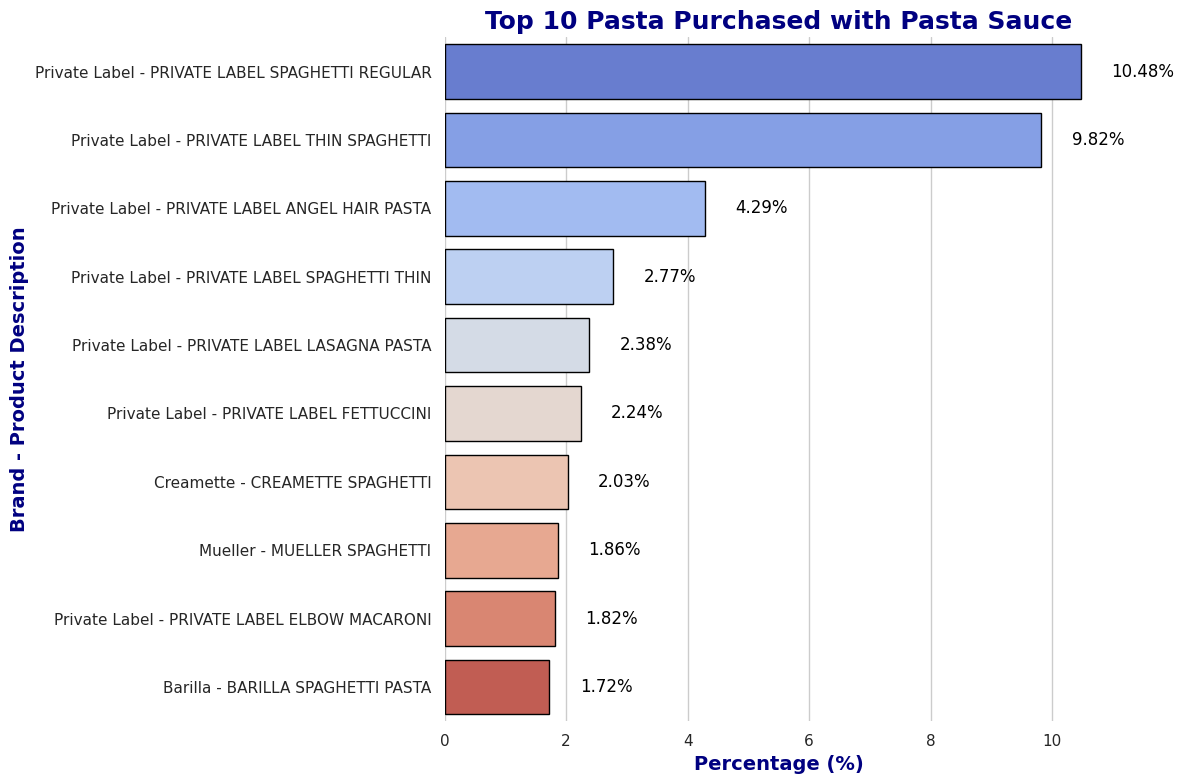

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# สร้างคอลัมน์ใหม่ที่รวม brand และ product_description
top_10_pasta['brand_product'] = top_10_pasta['brand'] + ' - ' + top_10_pasta['product_description']

# กำหนดขนาดและสไตล์ของกราฟ
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# วาดกราฟแท่งพร้อมแสดงค่าบนแต่ละแท่ง โดยใช้ brand_product เป็นแกน y
ax = sns.barplot(x='percentage', y='brand_product', data=top_10_pasta, palette='coolwarm', edgecolor='black')

# เพิ่มค่าเปอร์เซ็นต์บนแต่ละแท่ง
for i, (percentage, brand_product) in enumerate(zip(top_10_pasta['percentage'], top_10_pasta['brand_product'])):
    ax.text(percentage + 0.5, i, f'{percentage:.2f}%', va='center', color='black', fontsize=12)

# เพิ่มชื่อกราฟและปรับแต่ง labels
plt.title('Top 10 Pasta Purchased with Pasta Sauce', fontsize=18, weight='bold', color='navy')
plt.xlabel('Percentage (%)', fontsize=14, weight='bold', color='navy')
plt.ylabel('Brand - Product Description', fontsize=14, weight='bold', color='navy')

# ปรับปรุงแกนและลบกรอบรอบกราฟ
sns.despine(left=True, bottom=True)

# แสดงกราฟ
plt.tight_layout()
plt.show()


In [21]:
# นับจำนวน syrups ที่มีการซื้อพร้อมกับซอสพาสต้า
syrups_brands = merged_baskets_syrups.groupby(['brand','product_description']).size().reset_index(name='count')

# คำนวณจำนวนทั้งหมดของ syrups ที่มีการซื้อพร้อมกับซอสพาสต้า
total_syrups_baskets = syrups_brands['count'].sum()

# เพิ่มคอลัมน์เพื่อคำนวณเปอร์เซ็นต์ของแต่ละแบรนด์และชื่อสินค้า
syrups_brands['percentage'] = (syrups_brands['count'] / total_syrups_baskets) * 100

# เรียงลำดับจากเปอร์เซ็นต์สูงสุด และเลือกแค่ top 10
top_10_syrups = syrups_brands.sort_values(by='percentage', ascending=False).head(10)

# แสดงผล top 10 syrups พร้อมแบรนด์และเปอร์เซ็นต์
top_10_syrups[['brand', 'product_description', 'percentage']]

,brand,product_description,percentage
89,Private Label,PRIVATE LABEL SYRUP PLASTIC BOTTLE,11.023054
82,Private Label,PRIVATE LABEL BUTTERED SYRUP,7.680237
86,Private Label,PRIVATE LABEL LITE PANCAKE SYRUP,6.306021
64,Mrs Butterworth,MRS BUTTERWORTH SYRUP,4.957165
7,Aunt Jemima,AUNT JEMIMA ORIGINL SYRUP,4.861271
88,Private Label,PRIVATE LABEL PANCAKE SYRUP,4.304135
85,Private Label,PRIVATE LABEL HONEY MAPLE SYRUP,3.234243
4,Aunt Jemima,ANT JEMIMA CONTRY RICH SY,2.967166
6,Aunt Jemima,AUNT JEMIMA LITE SYRUP,2.904558
47,Log Cabin,LOG CABIN SYRUP REG,2.757150


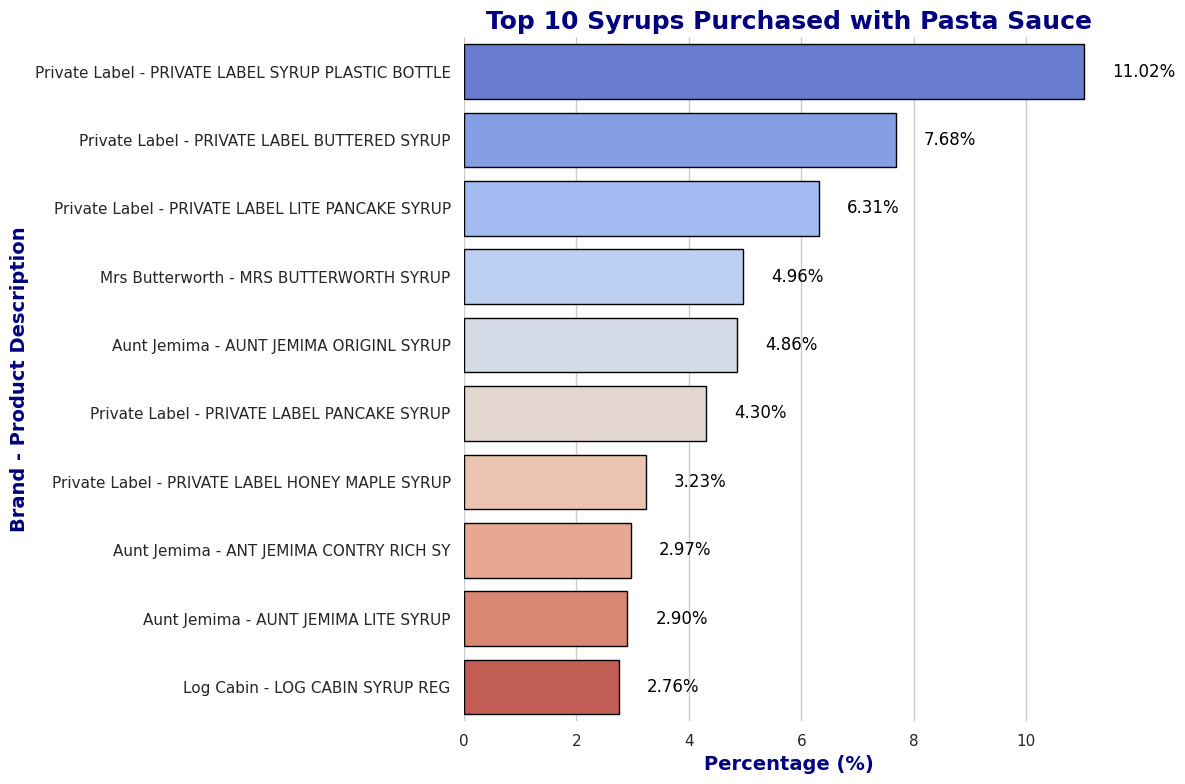

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# สร้างคอลัมน์ใหม่ที่รวม brand และ product_description
top_10_syrups['brand_product'] = top_10_syrups['brand'] + ' - ' + top_10_syrups['product_description']

# กำหนดขนาดและสไตล์ของกราฟ
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# วาดกราฟแท่งพร้อมแสดงค่าบนแต่ละแท่ง โดยใช้ brand_product เป็นแกน y
ax = sns.barplot(x='percentage', y='brand_product', data=top_10_syrups, palette='coolwarm', edgecolor='black')

# เพิ่มค่าเปอร์เซ็นต์บนแต่ละแท่ง
for i, (percentage, brand_product) in enumerate(zip(top_10_syrups['percentage'], top_10_syrups['brand_product'])):
    ax.text(percentage + 0.5, i, f'{percentage:.2f}%', va='center', color='black', fontsize=12)

# เพิ่มชื่อกราฟและปรับแต่ง labels
plt.title('Top 10 Syrups Purchased with Pasta Sauce', fontsize=18, weight='bold', color='navy')
plt.xlabel('Percentage (%)', fontsize=14, weight='bold', color='navy')
plt.ylabel('Brand - Product Description', fontsize=14, weight='bold', color='navy')

# ปรับปรุงแกนและลบกรอบรอบกราฟ
sns.despine(left=True, bottom=True)

# แสดงกราฟ
plt.tight_layout()
plt.show()


In [23]:
# นับจำนวน pancake mixes ที่มีการซื้อพร้อมกับซอสพาสต้า
pancake_mixes_brands = merged_baskets_pancake_mixes.groupby(['brand','product_description']).size().reset_index(name='count')

# คำนวณจำนวนทั้งหมดของ pancake mixes ที่มีการซื้อพร้อมกับซอสพาสต้า
total_pancake_mixes_baskets = pancake_mixes_brands['count'].sum()

# เพิ่มคอลัมน์เพื่อคำนวณเปอร์เซ็นต์ของแต่ละแบรนด์และชื่อสินค้า
pancake_mixes_brands['percentage'] = (pancake_mixes_brands['count'] / total_pancake_mixes_baskets) * 100

# เรียงลำดับจากเปอร์เซ็นต์สูงสุด และเลือกแค่ top 10
top_10_pancake_mixes = pancake_mixes_brands.sort_values(by='percentage', ascending=False).head(10)

# แสดงผล top 10 pancake mixes พร้อมแบรนด์และเปอร์เซ็นต์
top_10_pancake_mixes[['brand', 'product_description', 'percentage']]

,brand,product_description,percentage
40,Private Label,PRIVATE LABEL COMPLETE PANCAKE MIX,21.788548
2,Aunt Jemima,AJ BUTTERMILK PANCAKE MIX,16.600552
1,Aunt Jemima,A/JEM COMPLETE PANCAKE MI,8.732321
18,Hungry Jack,H J PANCK BTRMLK COMP MIX,8.601242
3,Aunt Jemima,AUNT JEM ORIGINAL PANCAKE MIX,8.544326
19,Hungry Jack,H J PANCK MX EX LITE COMP,7.635392
7,Bisquick,BISQUICK SHK PR BTMK PNK,4.046223
42,White Lily,WH LILY BM PANCAKE MIX,2.274922
21,Hungry Jack,HNGRY JK COMP BTRMLK 4PK,2.104174
27,Krusteaz,KRUSTEAZ COMP BM PANCAKE,1.967920


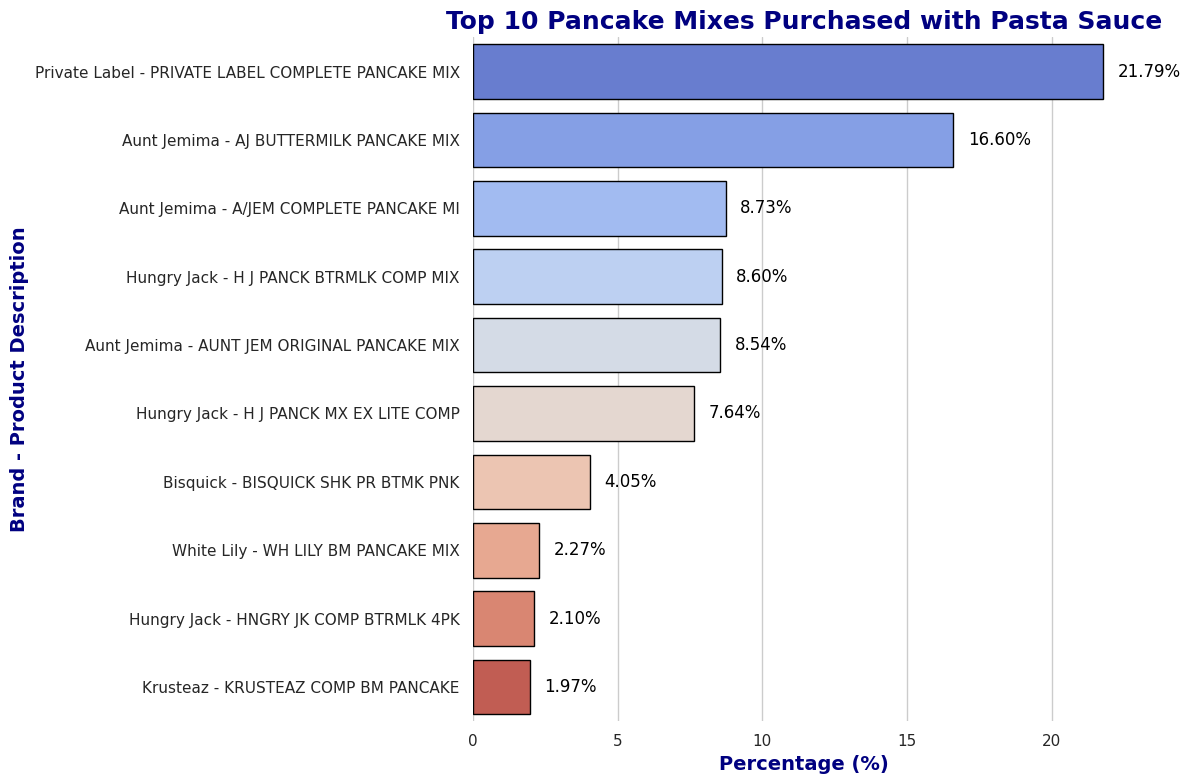

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# สร้างคอลัมน์ใหม่ที่รวม brand และ product_description
top_10_pancake_mixes['brand_product'] = top_10_pancake_mixes['brand'] + ' - ' + top_10_pancake_mixes['product_description']

# กำหนดขนาดและสไตล์ของกราฟ
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# วาดกราฟแท่งพร้อมแสดงค่าบนแต่ละแท่ง โดยใช้ brand_product เป็นแกน y
ax = sns.barplot(x='percentage', y='brand_product', data=top_10_pancake_mixes, palette='coolwarm', edgecolor='black')

# เพิ่มค่าเปอร์เซ็นต์บนแต่ละแท่ง
for i, (percentage, brand_product) in enumerate(zip(top_10_pancake_mixes['percentage'], top_10_pancake_mixes['brand_product'])):
    ax.text(percentage + 0.5, i, f'{percentage:.2f}%', va='center', color='black', fontsize=12)

# เพิ่มชื่อกราฟและปรับแต่ง labels
plt.title('Top 10 Pancake Mixes Purchased with Pasta Sauce', fontsize=18, weight='bold', color='navy')
plt.xlabel('Percentage (%)', fontsize=14, weight='bold', color='navy')
plt.ylabel('Brand - Product Description', fontsize=14, weight='bold', color='navy')

# ปรับปรุงแกนและลบกรอบรอบกราฟ
sns.despine(left=True, bottom=True)

# แสดงกราฟ
plt.tight_layout()
plt.show()


# Products Purchased Together

In [25]:
df_product_y = merged_df_productx.copy()
df_product_y.head()

,upc,dollar_sales,units,time_of_transaction,geography,week,household,store,basket,day,coupon,product_description,commodity,brand,product_size,store_zip_code
0,7680850106,0.80,1,1100,2,1,125434,244,1,1,0,BARILLA ANGEL HAIR,pasta,Barilla,16 OZ,40222
1,3620000470,3.59,1,1100,2,1,125434,244,1,1,0,BERTOLLI TOM&BASIL SAUCE,pasta sauce,Bertolli,24 OZ,40222
2,1800028064,2.25,1,1137,2,1,108320,244,2,1,0,H J PANCK BTRMLK COMP MIX,pancake mixes,Hungry Jack,32 OZ,40222
3,9999985067,0.85,1,1148,2,1,162016,244,3,1,0,PRIVATE LABEL VERMICELLI,pasta,Private Label,16 OZ,40222
4,9999985131,2.19,1,1323,2,1,89437,244,4,1,0,PRIVATE LABEL IMPORTED LASAGNA,pasta,Private Label Premium,16 OZ,40222


In [26]:
df_product_y.columns

Index(['upc', 'dollar_sales', 'units', 'time_of_transaction', 'geography',
       'week', 'household', 'store', 'basket', 'day', 'coupon',
       'product_description', 'commodity', 'brand', 'product_size',
       'store_zip_code'],
      dtype='object')

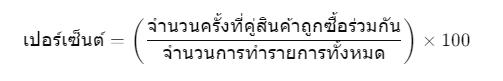

In [27]:
import pandas as pd
from itertools import combinations
from collections import Counter

# Merge the dataframes as per the given instructions
merged_df_product_y = pd.merge(dh_transactions, dh_product, on='upc', how='left')
merged_df_product_y = pd.merge(merged_df_product_y, dh_causal, on=['upc', 'store', 'week'], how='left')
merged_df_product_y = merged_df_product_y.drop(['feature_desc', 'display_desc', 'geography_y'], axis=1)
merged_df_product_y = merged_df_product_y.rename(columns={'geography_x': 'geography'})
merged_df_product_y = pd.merge(merged_df_product_y, dh_store, on='store', how='left')

# Filter the relevant commodities
relevant_commodities = ['pasta', 'pasta sauce', 'syrups', 'pancake mixes']
filtered_df = merged_df_product_y[merged_df_product_y['commodity'].isin(relevant_commodities)]

# Create a basket for each transaction (group by transaction id and create a set of commodities)
baskets = filtered_df.groupby('basket')['commodity'].apply(set)


pair_counts = Counter()

# Count each pair occurrence in the baskets
for basket_i in baskets:
    if len(basket_i) > 1:
        pairs = combinations(basket_i, 2)
        # Sort the pairs to avoid ordering discrepancies
        sorted_pairs = [tuple(sorted(pair)) for pair in pairs]
        pair_counts.update(sorted_pairs)

# Calculate the percentage of each pair occurring together
total_basket = len(baskets)
pair_percentages = {pair: (count / total_basket) * 100 for pair, count in pair_counts.items()}

# Display the results
print("Commonly Purchased Together Products and Their Percentages:")
for pair, percentage in pair_percentages.items():
    print(f"{pair}: {percentage:.2f}%")


Commonly Purchased Together Products and Their Percentages:
('pasta', 'pasta sauce'): 24.69%
('pasta', 'syrups'): 3.30%
('pasta sauce', 'syrups'): 2.84%
('pancake mixes', 'syrups'): 3.25%
('pancake mixes', 'pasta'): 1.51%
('pancake mixes', 'pasta sauce'): 1.31%


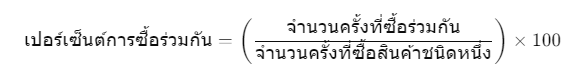

In [28]:
import pandas as pd
from itertools import combinations
from collections import Counter

# Merge the dataframes as per the given instructions
merged_df_product_yy = pd.merge(dh_transactions, dh_product, on='upc', how='left')
merged_df_product_yy = pd.merge(merged_df_product_yy, dh_causal, on=['upc', 'store', 'week'], how='left')
merged_df_product_yy = merged_df_product_yy.drop(['feature_desc', 'display_desc', 'geography_y'], axis=1)
merged_df_product_yy = merged_df_product_yy.rename(columns={'geography_x': 'geography'})
merged_df_product_yy = pd.merge(merged_df_product_yy, dh_store, on='store', how='left')

# Filter the relevant commodities
relevant_commodities = ['pasta', 'pasta sauce', 'syrups', 'pancake mixes']
filtered_df = merged_df_product_yy[merged_df_product_yy['commodity'].isin(relevant_commodities)]

# Create a basket for each transaction (group by transaction id and create a set of commodities)
baskets = filtered_df.groupby('basket')['commodity'].apply(set)

pair_counts = Counter()
single_counts = Counter()

# Count each pair occurrence in the baskets and count single commodity occurrences

for basket_i in baskets:
    if len(basket_i) > 1:
        pairs = combinations(basket_i, 2)
        sorted_pairs = [tuple(sorted(pair)) for pair in pairs]  # Sort pairs
        pair_counts.update(sorted_pairs)
    single_counts.update(basket_i)

# Calculate the conditional probability for each pair
conditional_percentages = {
    pair: (count / single_counts[pair[0]]) * 100
    for pair, count in pair_counts.items()
}

# Display the results
print("Conditional Probability of Purchased Together Products:")
for pair, percentage in conditional_percentages.items():
    print(f"{pair}: {percentage:.2f}%")


Conditional Probability of Purchased Together Products:
('pasta', 'pasta sauce'): 41.79%
('pasta', 'syrups'): 5.59%
('pasta sauce', 'syrups'): 6.11%
('pancake mixes', 'syrups'): 40.81%
('pancake mixes', 'pasta'): 18.91%
('pancake mixes', 'pasta sauce'): 16.51%


# Use Coupon

In [29]:
merged_df_product_z = pd.merge(dh_transactions, dh_product, on='upc', how='left')
merged_df_product_z = pd.merge(merged_df_product_z, dh_causal, on=['upc', 'store', 'week'], how='left')
merged_df_product_z = merged_df_product_z.drop(['feature_desc', 'display_desc', 'geography_y'], axis=1)
merged_df_product_z = merged_df_product_z.rename(columns={'geography_x': 'geography'})
merged_df_product_z = pd.merge(merged_df_product_z, dh_store, on='store', how='left')

In [30]:
# Sort ข้อมูลตาม household, upc, และ time_of_transaction เพื่อหาการซื้อครั้งแรก
merged_df_product_z = merged_df_product_z.sort_values(by=['household', 'upc', 'time_of_transaction'])

# เลือกการซื้อครั้งแรกของแต่ละ household ต่อสินค้าแต่ละชนิด
first_purchase = merged_df_product_z.drop_duplicates(subset=['household', 'upc'], keep='first')

# หาการซื้อที่มีการใช้คูปอง
first_purchase_with_coupon = first_purchase[first_purchase['coupon'] > 0]

# จำนวนลูกค้าที่ใช้คูปองในการซื้อครั้งแรก
num_first_purchase_with_coupon = first_purchase_with_coupon['household'].nunique()
print(f"จำนวนลูกค้าที่ใช้คูปองในการซื้อครั้งแรก: {num_first_purchase_with_coupon}")


จำนวนลูกค้าที่ใช้คูปองในการซื้อครั้งแรก: 33944


In [31]:
# นับจำนวนการซื้อครั้งแรกที่ใช้คูปองแยกตามชนิดสินค้า (commodity)
commodity_counts = first_purchase_with_coupon['commodity'].value_counts()

# คำนวณเปอร์เซ็นต์การซื้อครั้งแรกที่ใช้คูปองแยกตามชนิดสินค้า
commodity_percentages = (commodity_counts / commodity_counts.sum()) * 100

# แสดงผลจำนวนและเปอร์เซ็นต์
print("จำนวนการซื้อครั้งแรกที่ใช้คูปองแยกตามชนิดสินค้า:")
print(commodity_counts)

print("\nเปอร์เซ็นต์การซื้อครั้งแรกที่ใช้คูปองแยกตามชนิดสินค้า:")
print(commodity_percentages)


จำนวนการซื้อครั้งแรกที่ใช้คูปองแยกตามชนิดสินค้า:
commodity
pasta sauce      31071
syrups           12960
pasta            10703
pancake mixes     3719
Name: count, dtype: int64

เปอร์เซ็นต์การซื้อครั้งแรกที่ใช้คูปองแยกตามชนิดสินค้า:
commodity
pasta sauce      53.155527
syrups           22.171659
pasta            18.310437
pancake mixes     6.362377
Name: count, dtype: float64


In [32]:

# หาลูกค้าที่ซื้อสินค้าหรือหมวดหมู่สินค้าเดิมซ้ำ
repeat_purchase = merged_df_product_z[merged_df_product_z.duplicated(subset=['household', 'upc'], keep=False)]

# ดูว่าลูกค้าที่ทำการซื้อครั้งแรกโดยใช้คูปอง มีการซื้อซ้ำหรือไม่
repeat_purchase_with_coupon = repeat_purchase[repeat_purchase['household'].isin(first_purchase_with_coupon['household'])]

# จำนวนลูกค้าที่ซื้อสินค้าหรือหมวดหมู่สินค้าเดิมซ้ำ
num_repeat_purchase_with_coupon = repeat_purchase_with_coupon['household'].nunique()
print(f"จำนวนลูกค้าที่ทำการซื้อซ้ำหลังจากใช้คูปองในการซื้อครั้งแรก: {num_repeat_purchase_with_coupon}")


จำนวนลูกค้าที่ทำการซื้อซ้ำหลังจากใช้คูปองในการซื้อครั้งแรก: 25700


In [33]:
# นับจำนวนการซื้อซ้ำของแต่ละ commodity
repeat_commodity_counts = repeat_purchase_with_coupon['commodity'].value_counts()

# คำนวณเปอร์เซ็นต์ (%) ของแต่ละ commodity
repeat_commodity_percentage = repeat_commodity_counts / repeat_commodity_counts.sum() * 100

# สร้าง DataFrame ที่เก็บจำนวนการซื้อซ้ำและเปอร์เซ็นต์ของแต่ละ commodity
commodity_stats = pd.DataFrame({
    'repeat_count': repeat_commodity_counts,
    'percentage': repeat_commodity_percentage
})

# แสดงผล
print(commodity_stats)


               repeat_count  percentage
commodity                              
pasta                191164   42.309488
pasta sauce          179779   39.789696
syrups                57402   12.704533
pancake mixes         23478    5.196283


In [38]:
# สร้างฟังก์ชันในการหา Top N ของแต่ละประเภทสินค้า
def top_n_per_commodity(df, commodity_column, product_column, n=10):
    top_n_dict = {}

    # หาประเภทสินค้าแต่ละชนิด (เช่น Pasta, )
    unique_commodities = df[commodity_column].unique()

    # วนลูปผ่านประเภทสินค้าแต่ละชนิด
    for commodity in unique_commodities:
        # กรองข้อมูลเฉพาะสินค้าที่อยู่ในประเภทสินค้านั้น
        commodity_df = df[df[commodity_column] == commodity]

        # นับจำนวนการซื้อของแต่ละสินค้าในประเภทนั้น
        top_products = commodity_df[product_column].value_counts().head(n)

        # เก็บข้อมูลใน dictionary
        top_n_dict[commodity] = top_products

    return top_n_dict

# เรียกใช้ฟังก์ชันเพื่อหา Top 10 ของแต่ละประเภท
top_10_by_commodity = top_n_per_commodity(repeat_purchase_with_coupon, 'commodity', 'product_description', n=10)

# แสดงผลลัพธ์ Top 10 ของแต่ละประเภทสินค้า
for commodity, top_products in top_10_by_commodity.items():
    print(f"สินค้าที่ซื้อหลังจากใช้คูปอง {commodity}:")
    print(top_products)
    print("\n")


Top 10 for syrups:
product_description
PRIVATE LABEL SYRUP PLASTIC BOTTLE    5239
PRIVATE LABEL LITE PANCAKE SYRUP      3837
MRS BUTTERWORTH SYRUP                 2722
PRIVATE LABEL BUTTERED SYRUP          2664
AUNT JEMIMA ORIGINL SYRUP             2512
LOG CABIN SYRUP REG                   2405
AUNT JEMIMA LITE SYRUP                2096
NRTHWDS BTR MPL FLV SYRUP             2072
QUAKER AUNT JAM BUTR LITE             2007
PILL H J MWV LITE SYRUP               1697
Name: count, dtype: int64


Top 10 for pasta:
product_description
PRIVATE LABEL THIN SPAGHETTI        17092
PRIVATE LABEL SPAGHETTI REGULAR     15692
PRIVATE LABEL ANGEL HAIR PASTA       9609
PRIVATE LABEL ELBOW MACARONI         7046
PRIVATE LABEL ELBO MACARONI          5645
PRIVATE LABEL SPAGHETTI THIN         4109
PRIVATE LABEL VERMICELLI             3892
PRIVATE LABEL LASAGNA PASTA          3677
PRIVATE LABEL EXTRA WIDE NOODLES     3565
PRIVATE LABEL PENNE RIGATE           3533
Name: count, dtype: int64


Top 10 for pasta 